In [22]:
import os

In [23]:
os.getcwd() # Get the working directory

'C:\\Users\\ANG\\Desktop\\EEOB_546X\\BCB546X-Fall2017\\Python_Assignment'

In [24]:
os.chdir('C:\\Users\\ANG\\Desktop\\EEOB_546X\\BCB546X-Fall2017\\Python_Assignment') 
# Re-direct the working directory to Python_Assignment

In [25]:
# SeqIO: the standard Sequence Input/Output interface for BioPython 1.43 and later.
from Bio import SeqIO
# To get the codon translation table
from Bio.Data import CodonTable
# Python Data Analysis Library
import pandas as pd

In [26]:
## Creat a function "get_sequences_from_file()" to extract species name and sequence from the fasta file
# Define the function "get_sequences_from_file(fasta_fn)"
def get_sequences_from_file(fasta_fn):
    # Define an empty dictionary "sequence_data_dict"
    sequence_data_dict = {}
    # Define record as the content in file fasta_fn(file type = fasta, opened under SeqIQ.parse)
    for record in SeqIO.parse(fasta_fn, "fasta"):
        #Grabbing the description part from fasta_fn
        description = record.description.split()
        # Define species_name
        species_name = description[1] + " " + description[2]
        # Define the key as "species_name" and the value as the corresponding sequencing
        sequence_data_dict[species_name] = record.seq
    # print out "sequence_data_dict"
    return(sequence_data_dict)

In [27]:
## Translate DNA into protein sequence, https://stackoverflow.com/questions/19521905/translation-dna-to-protein
def translate_dna(sequence): # Define the function "translate_dna(sequence)"
    mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"] # Vertebrate Mitochondrial codon for translation
    proteinsequence = "" #Set up "proteinsequence" for the upcoming translation
    stop = sequence.find('TAA')|sequence.find('TAG')|sequence.find('AGA')|sequence.find('AGG') #Setting up the stop condons
    # Defining the DNA coding of "sequence", from the first element to the stop codons, for translation
    cds = str(sequence[:int(stop)])
    
    for n in range(0,len(cds),3): # Read the codons for translation
        if cds[n:n+3] in mito_table.forward_table: # Fit the codons to the mitochondrial tables
            proteinsequence += mito_table.forward_table[cds[n:n+3]] # Start translation
    # Return protein sequence
    return(proteinsequence)

In [28]:
## Call out the existing function in Biopython to do the translation work, http://biopython.org/DIST/docs/api/Bio-module.html
from Bio.Seq import Seq #From the package "Bio.Seq" import the module "Seq"
from Bio.Alphabet import IUPAC # From the package "Bio.Alphabet" import the module "IUPAC"
DNA = Seq("ATGGCCATTGTAATGGGCCGCTGAAAGGGTGCCCGATAG", IUPAC.unambiguous_dna) #Input DNA sequence with the unambiguity of the genetic code
DNA.translate(table="Vertebrate Mitochondrial") # Translate the DNA sequence with Vertebrate Mitochondrial codon table

Seq('MAIVMGRWKGAR*', HasStopCodon(IUPACProtein(), '*'))

In [29]:
## Call out the function in Biopython for comupting molecular weight of protein, http://biopython.org/DIST/docs/api/Bio-module.html
from Bio.SeqUtils.ProtParam import ProteinAnalysis # From the package "Bio.SeqUtils" import the mode "ProteinAnalysis"
def compute_molecular_weight(aa_seq): #Set up the function "compute_mplecular_weight(aa_seq)"
    X = ProteinAnalysis(aa_seq) #Process the aa_seq with the mode "ProteinAnalysis "
    return(X.molecular_weight()) #Return the molecular weight of the protein sequence

In [30]:
# Test the molecular weight function
compute_molecular_weight("MSKGAELFTG")

1040.1907000000003

In [31]:
## Write a function to compute GC content, https://eeob-biodata.github.io/2017-python-programming/01-intro/
def GC_content(Seq): # Defin the function "GC_content(Seq)"
    count = 0 # Counting of G/C, starting from zero
    for base in Seq: # For every single base in DNA sequence
        if base == "G" or base == "C": # If the single base is equal to either G or C
            count += 1 # Counting of G/C will have one point
            Length = len(Seq) # Total length of the input sequence
            ratio = count/Length # Calculate the GC ratio
    return (ratio) #Return the result of GC content

In [32]:
# Test the GC content function
GC_content("ATGGCCATTGTAATGGGCCGCTGAAAGGGTGCCCGATAG")

0.5641025641025641

In [33]:
## Read the row file to get the DNA sequence and table
# Call the function "get_sequences_from _file" to extract the sequence from the fasta file "penguins_cytb.fasta"
cytb_seqs = get_sequences_from_file("penguins_cytb.fasta")
# set up the table names "penguins_df" with the content coming from the file "penguins_mass.csv"
penguins_df = pd.read_csv("penguins_mass.csv") 
# Set up the list "species_list" from the column "species" in the table "penguins_df"
species_list = list(penguins_df.species)

In [34]:
penguins_df # Call out the data frame from "penguins_mass.csv"

,species,mass
0,Aptenodytes forsteri,28.00
1,Aptenodytes patagonicus,13.40
2,Eudyptes chrysocome,2.80
3,Eudyptes chrysolophus,4.50
4,Eudyptes sclateri,4.25
5,Eudyptula minor,1.60
6,Pygoscelis adeliae,4.60
7,Pygoscelis antarctica,4.10
8,Pygoscelis papua,6.10
9,Spheniscus demersus,3.20


In [35]:
cytb_seqs # Test the function "get_sequences_from_file()"

{'Aptenodytes forsteri': Seq('ATGGCCCCAAATCTCCGAAAATCCCATCCCCTCCTAAAAATAATTAATAACTCC...TAA', SingleLetterAlphabet()),
 'Aptenodytes patagonicus': Seq('ATGGCCCCAAACCTCCGAAAATCCCATCCTCTCCTAAAAATAATTAATAACTCC...TAA', SingleLetterAlphabet()),
 'Eudyptes chrysocome': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCCCTCCTAAAAACAATCAATAACTCC...TAA', SingleLetterAlphabet()),
 'Eudyptes chrysolophus': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCCCTCCTAAAAACAATCAATAACTCC...TAA', SingleLetterAlphabet()),
 'Eudyptes sclateri': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCCCTCCTAAAAACAATCAATAACTCC...TAA', SingleLetterAlphabet()),
 'Eudyptula minor': Seq('ATGGCCCCCAACCTCCGAAAATCTCACCCCCTCCTAAAAATAATCAACAACTCT...TAA', SingleLetterAlphabet()),
 'Pygoscelis adeliae': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCTCTCCTAAAAATAATTAACAACTCC...TAA', SingleLetterAlphabet()),
 'Pygoscelis antarctica': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCTCTCCTAAAAATAATCAACAACTCC...TAG', SingleLetterAlphabet()),
 'Pygoscelis papua': Seq('ATGGCCCCCAACCTTCGAAAATCCCACCCTCTCCTA

In [36]:
## Extract the DNA sequence for GC content and molecular weight calculation, http://biopython.org/DIST/docs/api/Bio.Seq.Seq-class.html
Mol_Weight = [] #Set up the list "Mol_Weight"
GC_cont = [] #Set up the list "GC_cont"
for seq_body in cytb_seqs.values(): # Use for loop to grab the sequence of species from the dictionary "cytb_seqs"
    AA_Seq = seq_body.translate(table="Vertebrate Mitochondrial") # Translate DNA sequence into amino acid sequence
    # Delete the "*" sign and then process the amino acid sequence with the mode "compute_molecular_weight". The result will then be appended to the empty list "Mol_Weight"
    Mol_Weight.append(compute_molecular_weight(str(AA_Seq.rstrip("*"))))
    # Get the GC content from DNA sequence. Append the result to the empty list "GC_cont"
    GC_cont.append(GC_content(seq_body))
    print(GC_cont) # print out GC content to see whether it works
    print (Mol_Weight)# print out Molecular Weight to see whether it works

[0.48381452318460194]
[42459.602100000004]
[0.48381452318460194, 0.4969378827646544]
[42459.602100000004, 42563.70669999999]
[0.48381452318460194, 0.4969378827646544, 0.5118110236220472]
[42459.602100000004, 42563.70669999999, 42475.5753]
[0.48381452318460194, 0.4969378827646544, 0.5118110236220472, 0.5091863517060368]
[42459.602100000004, 42563.70669999999, 42475.5753, 42445.54929999999]
[0.48381452318460194, 0.4969378827646544, 0.5118110236220472, 0.5091863517060368, 0.5083114610673666]
[42459.602100000004, 42563.70669999999, 42475.5753, 42445.54929999999, 42475.5753]
[0.48381452318460194, 0.4969378827646544, 0.5118110236220472, 0.5091863517060368, 0.5083114610673666, 0.4925634295713036]
[42459.602100000004, 42563.70669999999, 42475.5753, 42445.54929999999, 42475.5753, 42491.64080000001]
[0.48381452318460194, 0.4969378827646544, 0.5118110236220472, 0.5091863517060368, 0.5083114610673666, 0.4925634295713036, 0.49081364829396323]
[42459.602100000004, 42563.70669999999, 42475.5753, 4244

In [37]:
# Append the result of GC content and Molecular Weight to the two new column (GC and MW) to the table "penguins_df"
penguins_df.assign(GC=GC_cont, MW=Mol_Weight)

,species,mass,GC,MW
0,Aptenodytes forsteri,28.00,0.483815,42459.6021
1,Aptenodytes patagonicus,13.40,0.496938,42563.7067
2,Eudyptes chrysocome,2.80,0.511811,42475.5753
3,Eudyptes chrysolophus,4.50,0.509186,42445.5493
4,Eudyptes sclateri,4.25,0.508311,42475.5753
5,Eudyptula minor,1.60,0.492563,42491.6408
6,Pygoscelis adeliae,4.60,0.490814,42458.6140
7,Pygoscelis antarctica,4.10,0.477690,42404.5423
8,Pygoscelis papua,6.10,0.471566,42595.8759
9,Spheniscus demersus,3.20,0.482940,42431.5490


In [38]:
# Write the new table to a new CSV file "penguins_mass_cytb.csv"
penguins_df.assign(GC=GC_cont, MW=Mol_Weight).to_csv('C:\\Users\\ANG\\Desktop\\EEOB_546X\\BCB546X-Fall2017\\Python_Assignment\\penguins_mass_cytb.csv', sep=',')

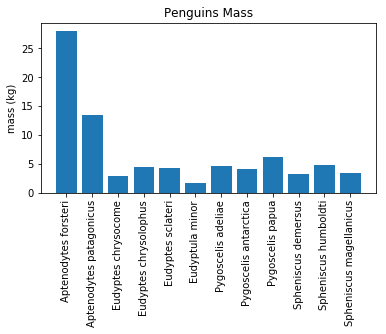

In [39]:
## Plotting of penguins mass to the species, https://python-graph-gallery.com/barplot/
import numpy as np # import the package "NumPy" to process arrays and matrices
import matplotlib.pyplot as plt # import the package "matplotlib.pyplot" for plotting

mass = penguins_df["mass"] # X axis as "mass"
bars = penguins_df["species"] # Y axis as "species"
y_pos = np.arange(len(bars)) # The position of each bar on X axis 

plt.bar(y_pos, mass) # Create bars
plt.xticks(y_pos, bars, rotation=90) # Rotation of the bars names
plt.subplots_adjust(bottom=0.4, top=0.99) # Custom the format of layout

plt.title('Penguins Mass') # Title of the plot
plt.ylabel('mass (kg)') # label Y axis with "mass (kg)"

plt.show() # Show graphic

# What is the smallest penguin species? Eudyptula minor
# What else is interesting about this species? The Oamaru Blue Penguin Colony is a good place to visit Eudyptula minor in New Zealand.


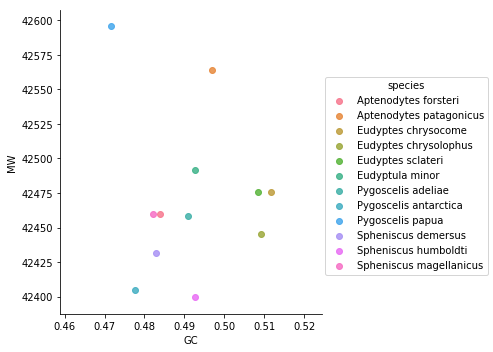

In [40]:
## Correlation plot of Molecular Weight and GC content, https://python-graph-gallery.com/scatter-plot/
import seaborn as sns # Import the package "seaborn" for plotting

# set up the new table names "penguins_all" from the file "penguins_all.csv"; discard the index_column
penguins_all = pd.read_csv("penguins_all.csv", index_col=0)

#From "penguins_all", make the plot with MW against GC. Label the data with different color according to the species 
sns.lmplot("GC", "MW", data=penguins_all, fit_reg=False, markers='o', hue='species')
plt.show() # Show graphic